<a href="https://colab.research.google.com/github/olive-green/data-science/blob/main/linear-regression/Linear_regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np

In [26]:
class Linear_Regression():
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate #here learning rate is lambda in convergence formula or weight updation formula ie. Bnew=B(old) - lambda(d/df(cf))
    self.no_of_iterations=no_of_iterations

  # fit function to train the model
  def fit(self,x,y):
    # no of training examples, no of features
    self.m,self.n=x.shape

    #initiating the weights and bias 
    # weights are independent variables ie. features
    self.w=np.zeros(self.n)
    self.b=0
    self.x=x
    self.y=y

    # implementing gradient descent for optimizations
    for i in range(self.no_of_iterations):
      self.update_weights()

  # function to update weights in gradient descent
  def update_weights(self):
    y_prediction=self.predict(self.x)

    # calculate gradients
    dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
    db=-2*np.sum(self.y-y_prediction)/self.m

    # updating the weights
    self.w=self.w- self.learning_rate*dw # B(new)=B(old) - lambda* d/dB(c.f)
    self.b=self.b - self.learning_rate*db






  
  #Line function for prediction
  def predict(self,x):
    return x.dot(self.w)+self.b  




In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [28]:
# loading the data  from csv file
salary_data=pd.read_csv('https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Linear%20Regression/salary_data.csv')

In [29]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [30]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


##Splitting the feature and target varaible

In [31]:
x=salary_data[["YearsExperience"]]  #If you want to select data and keep it in a DataFrame, you will need to use double square brackets:
y=salary_data["Salary"]

In [32]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [33]:
# splitting the dataset into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)


In [34]:
print(x_train)

    YearsExperience
5               2.9
27              9.6
12              4.0
4               2.2
10              3.9
16              5.1
28             10.3
25              9.0
17              5.3
2               1.5
7               3.2
26              9.5
24              8.7
18              5.9
11              4.0
22              7.9
29             10.5
13              4.1
15              4.9
8               3.2


In [35]:
x_train.shape

(20, 1)

##Training the linear regression model

In [36]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [37]:
model.fit(x_train,y_train)

In [38]:
# printing the parameter values(weight and bias)
print("weight= ",model.w[0])
print("bias= ",model.b)

weight=  9514.400999035135
bias=  23697.406507136307


In [39]:
# predict the salary for test data
test_data_prediction=model.predict(x_test)

In [40]:
print(test_data_prediction)

1      36066.127806
0      34163.247606
14     66512.211003
9      58900.690204
21     91249.653600
19     80783.812501
23    101715.494699
6      52240.609504
3      42726.208505
20     88395.333301
dtype: float64


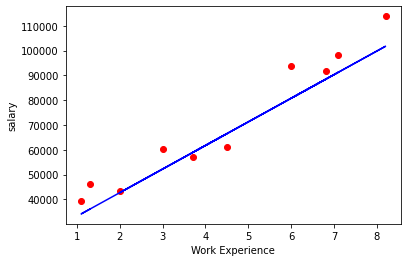

In [41]:
# visualising the predicted values
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,test_data_prediction,color="blue")
plt.xlabel("Work Experience")
plt.ylabel("salary")
plt.show()

In [45]:
# for measuring perfomance we write rmse
# mse mean squared error
mse= np.sum(( test_data_prediction- y_test) ** 2)

# rmse
rmse= np.sqrt(mse/x.shape[0])
print(rmse)


4490.128353965299


In [46]:
print(x.shape[0])

30


#using library

In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Pepcoders/Data-Science-January/main/Linear%20Regression/salary_data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# splitting the feature and target variable
X=data[["YearsExperience"]]
y=data["Salary"]

In [9]:
X.head()


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [12]:
type(X)

pandas.core.frame.DataFrame

In [10]:
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [14]:
# split the dataset into testing and training
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=2)

In [15]:
# training phase
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
# measuring accuracy
print(regressor.score(X_test,y_test))

0.9041801644162628


In [22]:
# prediction time
y_pred=regressor.predict(X_test)

In [23]:
y_pred

array([ 36074.64173049,  34172.05273297,  66516.0656909 ,  58905.7097008 ,
        91249.72265873,  80785.48317234, 101713.96214512,  52246.64820946,
        42733.70322183,  88395.83916244])

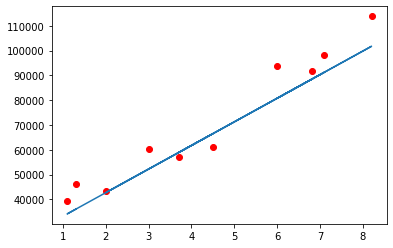

In [24]:
# plotting
plt.scatter(X_test,y_test,color="red")
plt.plot(X_test,y_pred)
plt.show()